#KNN

## Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Add DataSet

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
#Assgin colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
#Read dataset to pandas dataframe
dataset = pd.read_csv(url ,names=names)

###Run till here...

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
#Assgin colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
#Read dataset to pandas dataframe
dataset = pd.read_csv(url ,names=names)
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


##Preprocessing

In [ ]:
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, 4]
# X includes 4 first colum of dataset and Y includes the labels

###Segmentation of test and training data
To avoid over-fitting , we divide our dataset into two training parts,Train and Test,which gives us a better idea of how the algorithm performs in the test phase.In this way,the algorithm is tested on unseen data.Run the following script to create training and test partitions:

In [ ]:
 from sklearn.model_selection import trian_test_split
 X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.02)
 #The above script divides the dataset into 80% training data anad 20% testing data.This means that
 #- out of a total of 150 records (samples), the training set will contain 120 records and the test
 #- set will containn 30 recordes.


##Normalize or scale the features

Befor making any oredictions, it is best to scale or normalize the features so that they can all be evaluates qually.Beacause the range of raw data values varies widely,in some machine learning algorithms, the objective functions do not work properly without normalizatoin.For example, most classification algorithms calculate the distance.If an attribute has a range of values, the spacing is controlled by that particular attribute...

In [ ]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()()
Scaler.fit(X_trian)

X_trian = scaler.transform(X_trian)
X_test = Scaler.transform(X_test)

##Train and test dataset by KNN algorithm

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbers=5)
classifier.fit(X_train, Y_train)

####The first step is to import the KNeighborsClassifier class from the sklearn.neighbors library.In the second line, this class is initialized with a parameter,n_neighbors.This variable is the value of K. There is no ideal value for K, and the value of K can be chosen after experimention and evaluation, but to begin with, a value of 5 is the most commonly used value for the KNN algorithm. The final step is to make predictions on our test data.To fo this, run the follosing script:

In [ ]:
Y_pred = classifier.predict(X_test)

##Evaluation KNN Algorithm

####To evaluate an algorithm, *confusion matrix*, *precision*, *recall* and *F1 score* are the most commonly used criteria.To calculate these metrics,confusion_matrix and classification_report methods of sklearn.metrics can be used. Pay attention to the following script:

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
#Assgin colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
#Read dataset to pandas dataframe
dataset = pd.read_csv(url ,names=names)
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, 4]
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
Scaler.fit(X_train)

X_train = Scaler.transform(X_train)
X_test = Scaler.transform(X_test)
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[13  0  0]
 [ 0 10  2]
 [ 0  0  5]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.83      0.91        12
 Iris-virginica       0.71      1.00      0.83         5

       accuracy                           0.93        30
      macro avg       0.90      0.94      0.91        30
   weighted avg       0.95      0.93      0.94        30



######The results show that the KNN algorithm has been able to classify all 30 records in the test set eith almost 100% accuracy, which is excellent.ALthough the algorithm performed very well this dataseet, do not expect the same results.As mentioned earlier, KNN does not always perform well with hirh-dimensional features, but works best for low -dimensional features, but works best for low-dimenional features.

##Cmparing the amount of error with the value of K

####In the training and testing section of the KNN algorithm int Python, we said that there is no way to know in advance which value of K will give the best results.
One way to help you finde the best K value is to plot the K value and the corresponding error rate for the data set.
In this section, we plot the avarage error of the predicted values of the best set for all values of K between 1 and 40.To do this, let's first calculate the mean error for all predicted values where K varies between 1 and 40.Run the following script:

In [ ]:
error = []

#calculating error for K values between  1 and 40
for i in range(1, 40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, Y_train)
  pred_i = knn.predict(X_test)
  error.append(np.mean(pred_i != Y_test))

####The script above executes a loop from 1 to 40. In each interation. the average error of the predicted values of the test set is calculated and the result is added to the error list.The next step is to plot the error values against the K values. Run the following script to create the layout:

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

####The output graph is as follows:

<ipython-input-13-92697fc36ac9>:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(12, 6))


Text(0, 0.5, 'Mean Error')

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

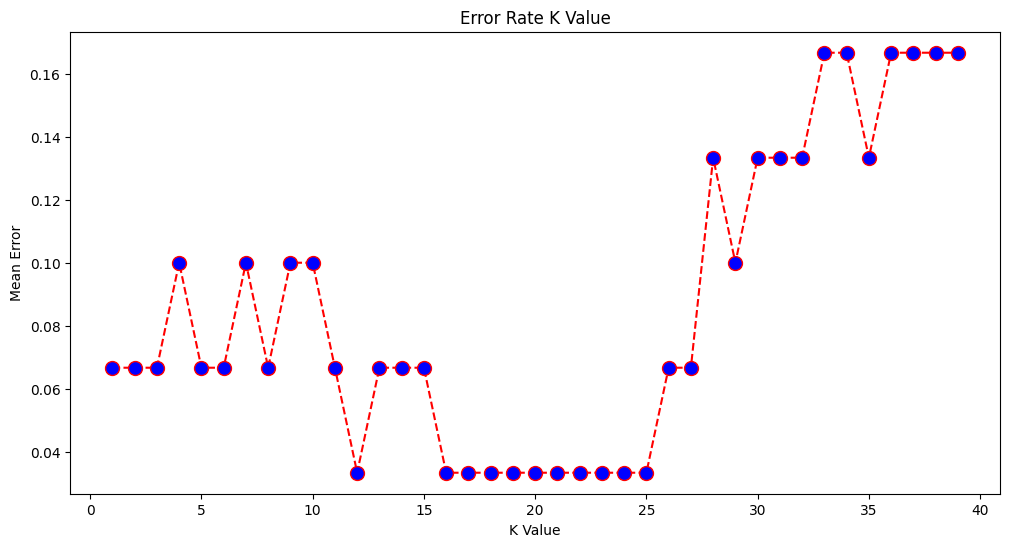

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
#Assgin colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
#Read dataset to pandas dataframe
dataset = pd.read_csv(url ,names=names)
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, 4]
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
Scaler.fit(X_train)

X_train = Scaler.transform(X_train)
X_test = Scaler.transform(X_test)
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix

error = []
for i in range(1, 40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, Y_train)
  pred_i = knn.predict(X_test)
  error.append(np.mean(pred_i != Y_test))
  plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

#####From the output, we can see that when the value of K is between 16 and 25, the average error is **zero**. I recommend playing around with the value of the predictions.

##Final Word

####KNN is a algorithm yet powerful classification algorithm. The KNN algorithm does not rquire Train to make predictions,which is usually one of the most difficult parts of a machine learning algorithm.KNN algorithm has been wiedly usesd to find ducument similary and pattern recognition.It has also been used to develop recommender systems and reduce dimensioality and preprocessing steps for machine vision, especially **face recognition tasks**.

[Source](https://programstore.ir/%D9%BE%DB%8C%D8%A7%D8%AF%D9%87-%D8%B3%D8%A7%D8%B2%DB%8C-%D8%A7%D9%84%DA%AF%D9%88%D8%B1%DB%8C%D8%AA%D9%85-knn-%D8%AF%D8%B1-%D9%BE%D8%A7%DB%8C%D8%AA%D9%88%D9%86-%D8%A2%D9%85%D9%88%D8%B2%D8%B4/)